#EXERCISE-3

#Que.1

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

In [40]:
df=pd.read_csv('f8.txt',sep='   ',index_col=None,header=None)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [41]:
A=df.to_numpy()

In [42]:
km=KMeans(n_clusters=20,random_state=None)

In [43]:
km.result=km.fit(A)

In [44]:
km.result.labels_

array([19, 19, 19, ...,  2,  2,  2], dtype=int32)

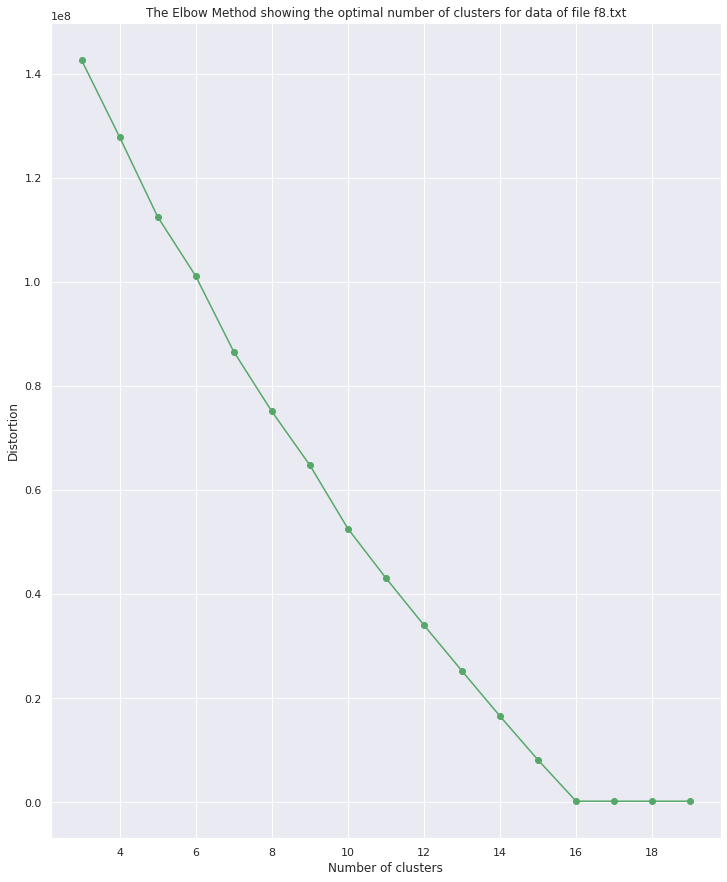

In [45]:
distortions = []
for k in range(3,20):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(A)
    distortions.append(kmeanModel.inertia_)
plt.plot(range(3,20), distortions, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters for data of file f8.txt');

Above curve shows that the 16 is the best choice for no. of clusters.

In [46]:
km16=KMeans(n_clusters=16,random_state=None)

In [47]:
km16.result=km16.fit(A)

In [48]:
km16.result.labels_

array([4, 4, 4, ..., 3, 3, 3], dtype=int32)

#Que.2

To visualize the clusters for the data of file f8.txt,we need to reduce the dimension of the data file and for this we will use PCA(Principal Component Analysis).PCA is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation.

With the help of PCA we convert our data set into a data set of two dimension and then will apply the Kmeans technique for clustering.

#Que.3&4


In [49]:
pca=PCA(2)
pca.fit(df)
pca_data=pd.DataFrame(pca.transform(df))

In [50]:
print(pca_data)

               0           1
0    -132.844278  246.866635
1    -125.024067  258.957966
2    -124.970768  259.816950
3    -126.540090  255.042677
4    -124.268304  252.358301
...          ...         ...
1019  -87.816256  113.494630
1020  -88.301492  117.233565
1021  -87.240410  115.708159
1022  -87.245158  116.641705
1023  -88.021227  115.891911

[1024 rows x 2 columns]


In [51]:
B=pca_data.to_numpy()

In [52]:
km1=KMeans(n_clusters=16,random_state=None)

In [53]:
km1.result=km1.fit(B)

Text(0.5, 1.0, 'plot for 16 clusters')

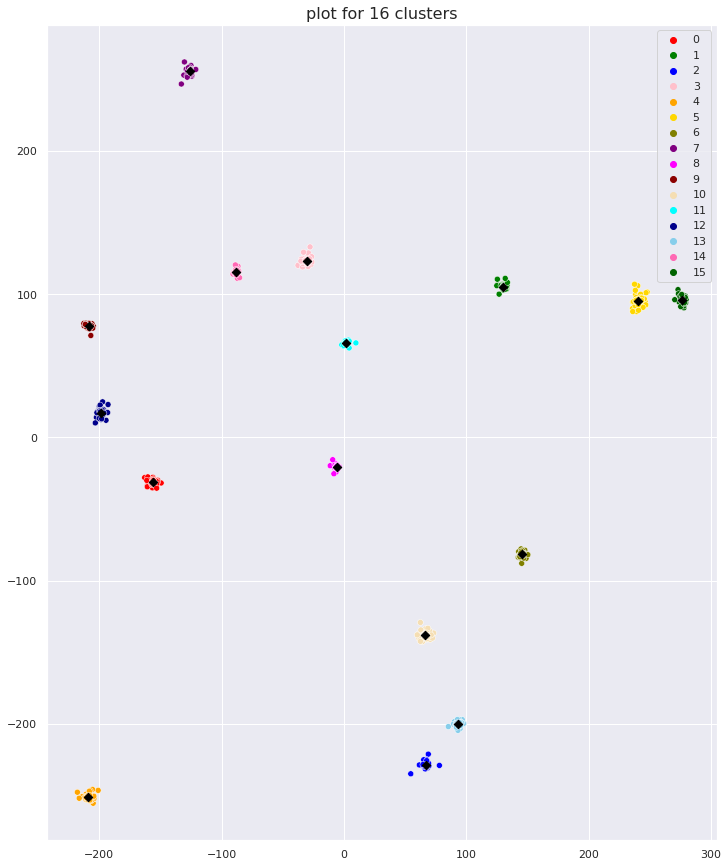

In [57]:
sns.set(rc={'figure.figsize':(12,15)})
sns.scatterplot(x=B[:,0],y=B[:,1],hue=km1.result.labels_,palette=['red','green','blue','pink','orange','gold','olive','purple','magenta','darkred','wheat','cyan','darkblue','skyblue','hotpink','darkgreen'])
plt.scatter(x=km1.result.cluster_centers_[:,0],y=km1.result.cluster_centers_[:,1],marker="D",color='black')
plt.title("plot for 16 clusters",fontsize=16)

For 3 clusters


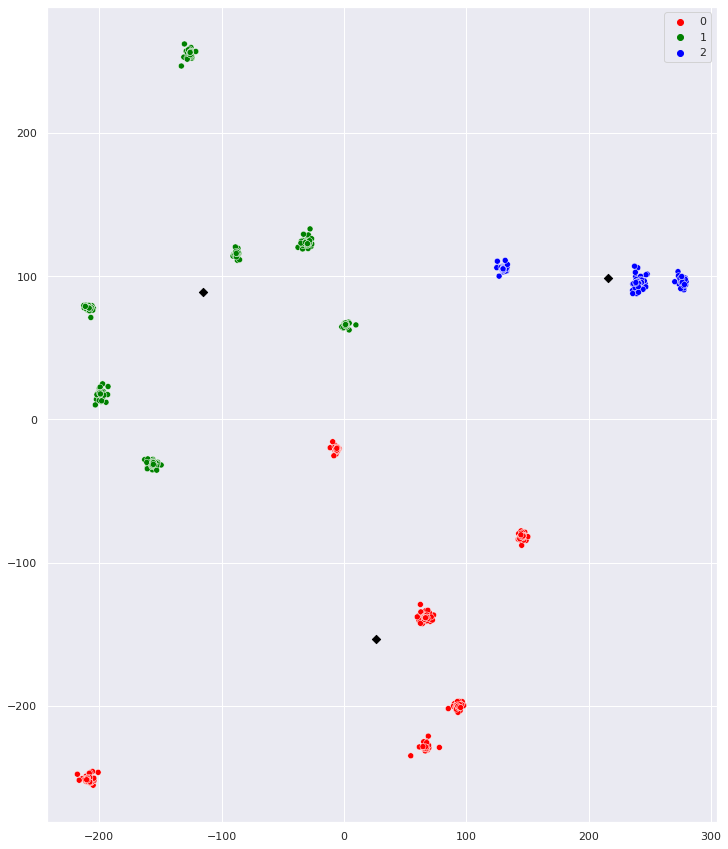

For 5 clusters


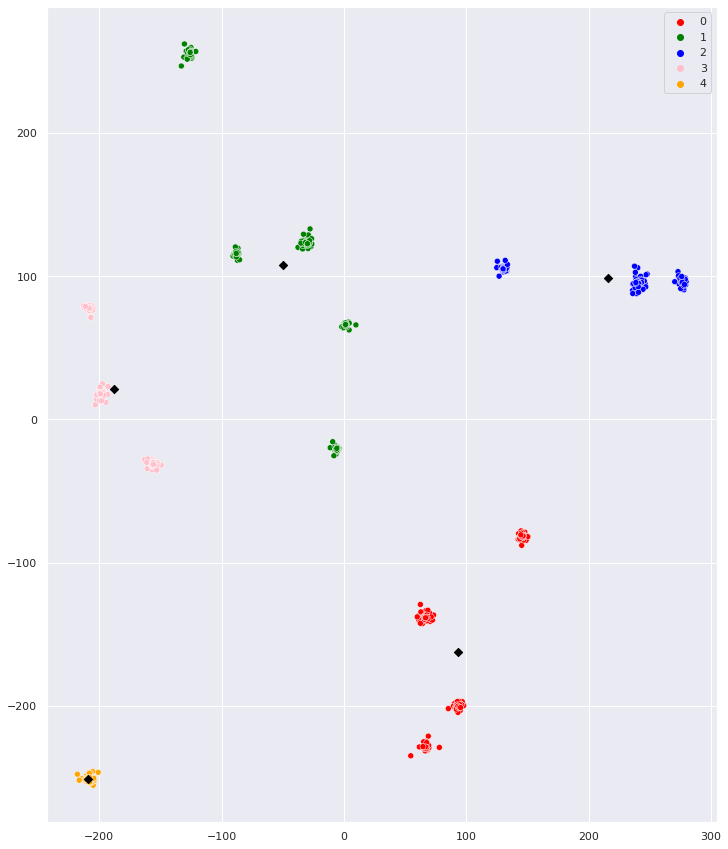

For 7 clusters


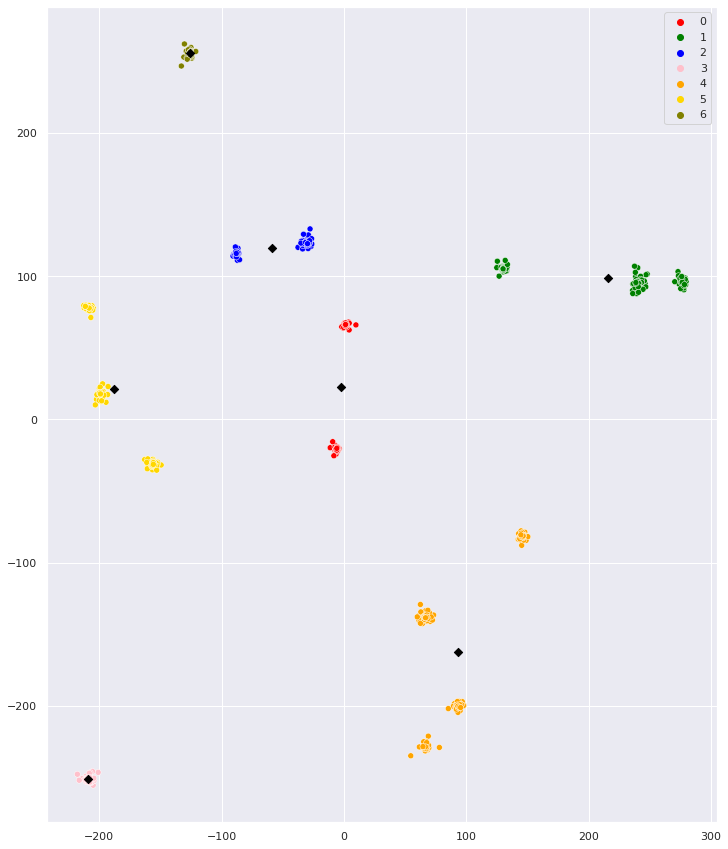

For 9 clusters


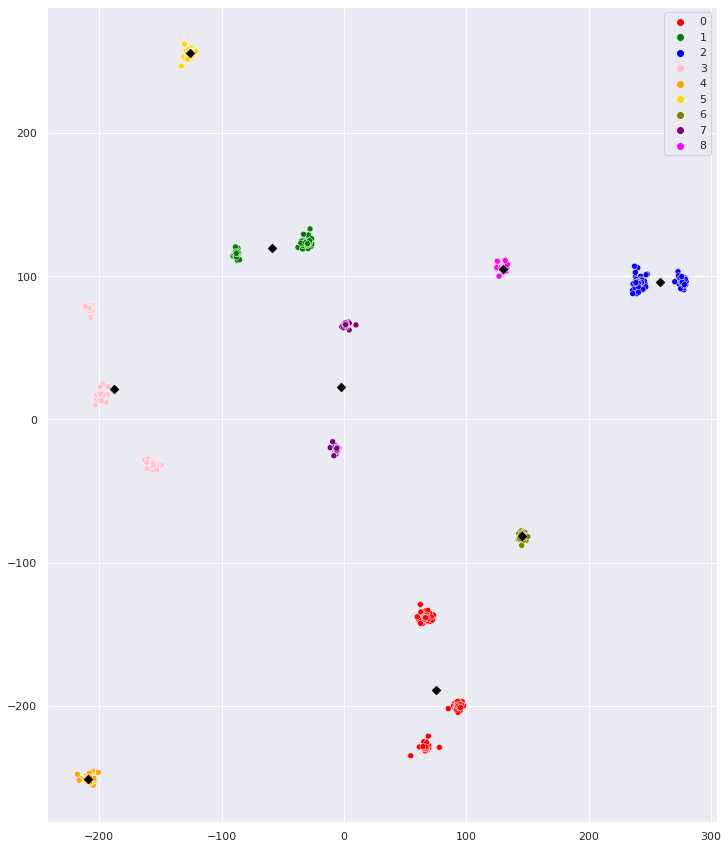

For 11 clusters


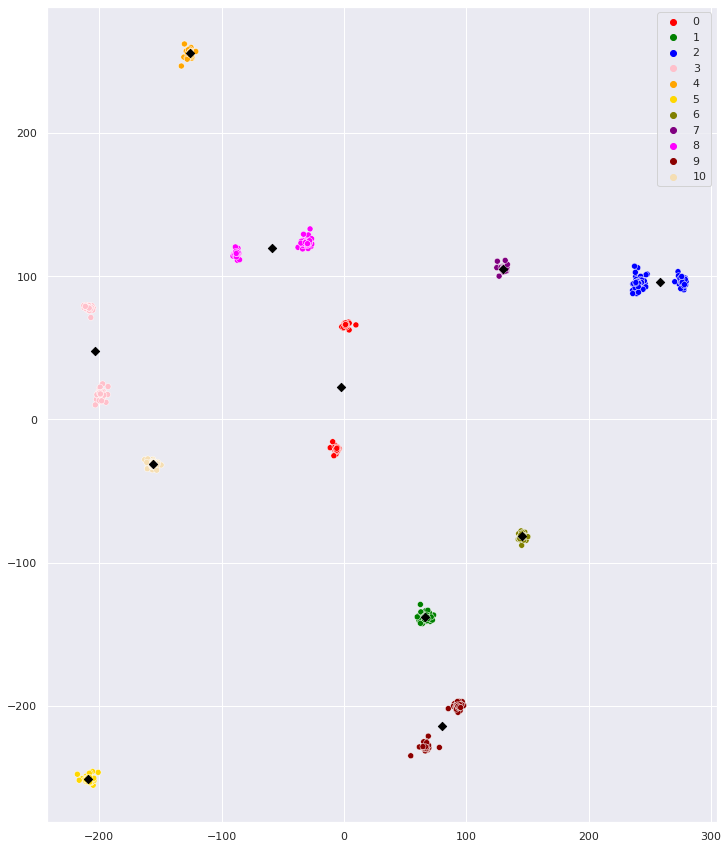

For 13 clusters


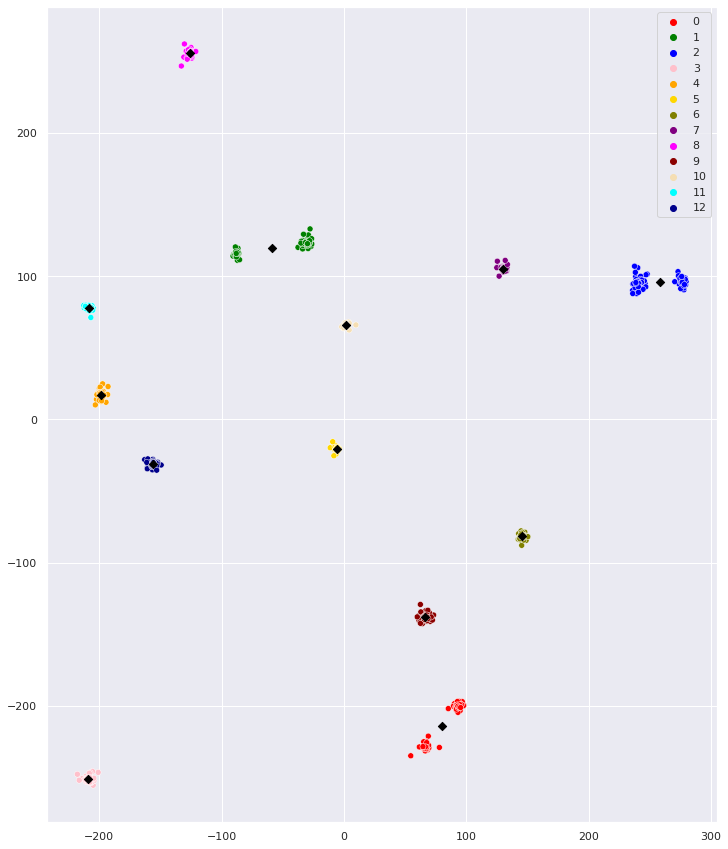

For 15 clusters


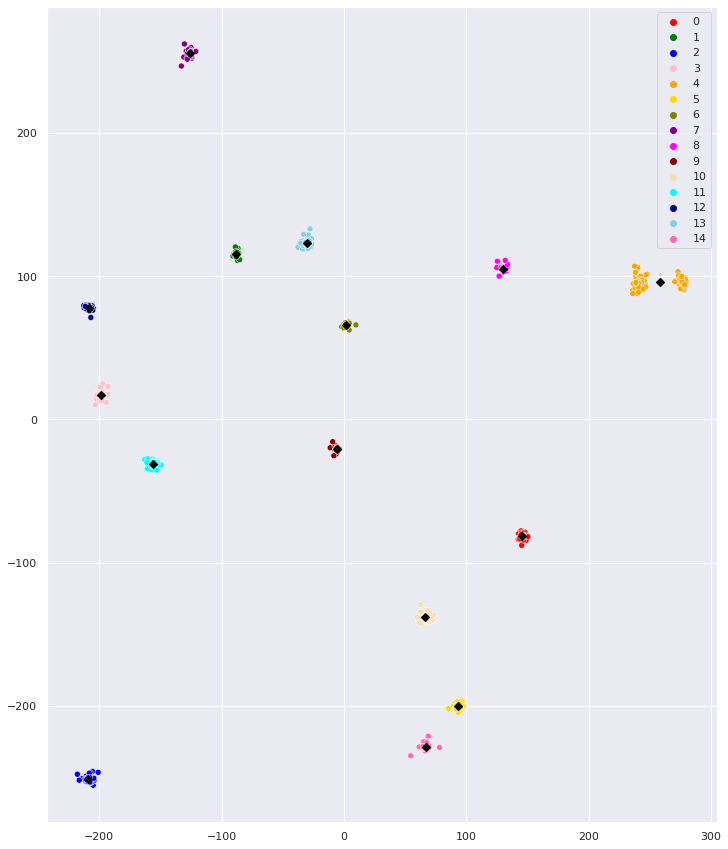

For 17 clusters


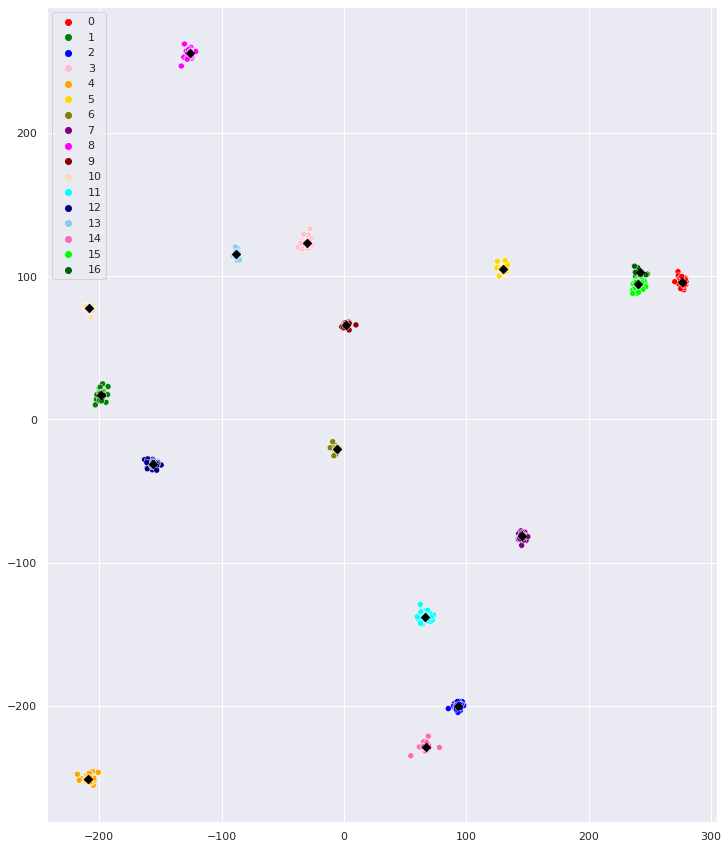

For 19 clusters


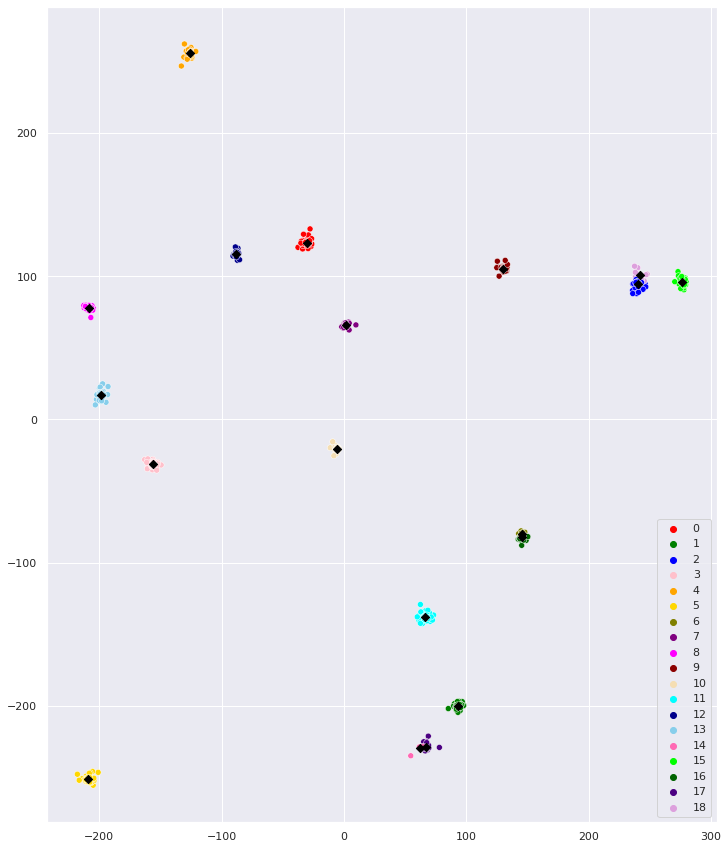

In [55]:
colours=['red','green','blue','pink','orange','gold','olive','purple','magenta','darkred','wheat','cyan','darkblue','skyblue','hotpink','lime','darkgreen','indigo','plum']
for K in [3,5,7,9,11,13,15,17,19]:
  print('For {} clusters'.format(K))
  km_K=KMeans(n_clusters=K,random_state=None)
  km_K.result=km_K.fit(B)
  sns.scatterplot(x=B[:,0],y=B[:,1],hue=km_K.result.labels_,palette=colours[0:K])
  plt.scatter(x=km_K.result.cluster_centers_[:,0],y=km_K.result.cluster_centers_[:,1],marker="D",color='black',s=34)
  plt.show()

